# 综合提升之炮弹发射轨迹预测

In [1]:
#数据加载
import pandas as pd
import numpy as np
data_train = pd.read_csv('task1_train_data.csv')
data_test = pd.read_csv('task1_test_data.csv')
data_train.head()
data_test.head()

,x_d,y_d
0,33.8465,59.3003
1,58.5384,119.9220
2,87.8723,194.7350
3,124.8290,266.9400
4,184.6340,327.4480


In [2]:
#训练数据与测试数据的赋值
X_train = data_train.loc[:,'x_d']
y_train = data_train.loc[:,'y_d']

X_test = data_test.loc[:,'x_d']
y_test = data_test.loc[:,'y_d']

print(X_train,y_train)

0     232.2740
1      64.8744
2      88.8854
3     116.5170
4     151.4440
5     186.4150
6     221.4130
7     243.1490
8     255.2350
9     268.5380
10    290.3210
11    309.6980
Name: x_d, dtype: float64 0     338.592
1     141.990
2     201.456
3     262.136
4     302.184
5     324.029
6     334.951
7     336.165
8     332.524
9     325.243
10    307.039
11    285.194
Name: y_d, dtype: float64


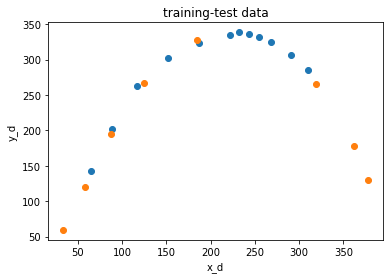

In [3]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test = plt.scatter(X_test,y_test,label='test data')
plt.title('training-test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.show()

In [4]:
#格式与维度的转化
print(X_train.shape)
X_train = np.array(X_train)
X_train = X_train.reshape(-1,1)
print(X_train.shape)
X_test = np.array(X_test).reshape(-1,1)
print(X_test.shape)

(12,)
(12, 1)
(8, 1)


In [5]:
#线性回归模型的建立与训练
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [6]:
#模型预测
y_train_predict = model1.predict(X_train)
y_test_predict = model1.predict(X_test)
print(y_test_predict)

[193.2015545  207.52252667 224.53579682 245.97018916 280.65629028
 358.35826068 383.81445438 392.54847322]


In [7]:
#模型评估
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print('trianing r2:',r2_train)
print('test r2:',r2_test)

trianing r2: 0.5756251457400435
test r2: -1.6553718247964797


In [8]:
#结果可视化 生成新的数据点
X_range = np.linspace(40,400,300).reshape(-1,1)
print(X_range.shape,min(X_range),max(X_range))
print(X_range)
y_range_predict = model1.predict(X_range)

(300, 1) [40.] [400.]
[[ 40.        ]
 [ 41.20401338]
 [ 42.40802676]
 [ 43.61204013]
 [ 44.81605351]
 [ 46.02006689]
 [ 47.22408027]
 [ 48.42809365]
 [ 49.63210702]
 [ 50.8361204 ]
 [ 52.04013378]
 [ 53.24414716]
 [ 54.44816054]
 [ 55.65217391]
 [ 56.85618729]
 [ 58.06020067]
 [ 59.26421405]
 [ 60.46822742]
 [ 61.6722408 ]
 [ 62.87625418]
 [ 64.08026756]
 [ 65.28428094]
 [ 66.48829431]
 [ 67.69230769]
 [ 68.89632107]
 [ 70.10033445]
 [ 71.30434783]
 [ 72.5083612 ]
 [ 73.71237458]
 [ 74.91638796]
 [ 76.12040134]
 [ 77.32441472]
 [ 78.52842809]
 [ 79.73244147]
 [ 80.93645485]
 [ 82.14046823]
 [ 83.34448161]
 [ 84.54849498]
 [ 85.75250836]
 [ 86.95652174]
 [ 88.16053512]
 [ 89.36454849]
 [ 90.56856187]
 [ 91.77257525]
 [ 92.97658863]
 [ 94.18060201]
 [ 95.38461538]
 [ 96.58862876]
 [ 97.79264214]
 [ 98.99665552]
 [100.2006689 ]
 [101.40468227]
 [102.60869565]
 [103.81270903]
 [105.01672241]
 [106.22073579]
 [107.42474916]
 [108.62876254]
 [109.83277592]
 [111.0367893 ]
 [112.24080268]
 [

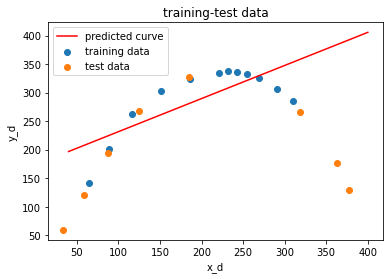

In [9]:
#结果可视化
fig2 = plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test = plt.scatter(X_test,y_test,label='test data')
curve_p = plt.plot(X_range,y_range_predict,'r',label='predicted curve')
plt.title('training-test data')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()

In [10]:
#生成二阶属性数据
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
print(X_train.shape,X_2_train.shape)
print(X_train[0:5],X_2_train[0:5,:])

(12, 1) (12, 3)
[[232.274 ]
 [ 64.8744]
 [ 88.8854]
 [116.517 ]
 [151.444 ]] [[1.00000000e+00 2.32274000e+02 5.39512111e+04]
 [1.00000000e+00 6.48744000e+01 4.20868778e+03]
 [1.00000000e+00 8.88854000e+01 7.90061433e+03]
 [1.00000000e+00 1.16517000e+02 1.35762113e+04]
 [1.00000000e+00 1.51444000e+02 2.29352851e+04]]


In [11]:
#建立新的回归模型 训练
model2 = LinearRegression()
model2.fit(X_2_train,y_train)


LinearRegression()

In [12]:
#模型预测及评估
y_2_train_predict = model2.predict(X_2_train)
y_2_test_predict = model2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)
print(r2_2_train,r2_2_test)

0.9954725354913146 0.9738532191575348


In [13]:
#结果可视化 生成新的数据点
X_range = np.linspace(40,400,300).reshape(-1,1)
X_2_range = poly2.transform(X_range)
y_2_range_predict = model2.predict(X_2_range)

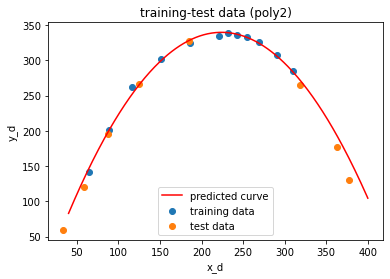

In [14]:
fig3 = plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test = plt.scatter(X_test,y_test,label='test data')
curve_p = plt.plot(X_range,y_2_range_predict,'r',label='predicted curve')
plt.title('training-test data (poly2)')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()

In [15]:
#生成六阶属性数据
from sklearn.preprocessing import PolynomialFeatures
poly6 = PolynomialFeatures(degree=6)
X_6_train = poly6.fit_transform(X_train)
X_6_test = poly6.transform(X_test)
print(X_train.shape,X_6_train.shape)
print(X_train[0:5],X_6_train[0:5,:])

(12, 1) (12, 7)
[[232.274 ]
 [ 64.8744]
 [ 88.8854]
 [116.517 ]
 [151.444 ]] [[1.00000000e+00 2.32274000e+02 5.39512111e+04 1.25314636e+07
  2.91073318e+09 6.76087638e+11 1.57037580e+14]
 [1.00000000e+00 6.48744000e+01 4.20868778e+03 2.73036094e+05
  1.77130528e+07 1.14912367e+09 7.45487087e+10]
 [1.00000000e+00 8.88854000e+01 7.90061433e+03 7.02249265e+05
  6.24197068e+07 5.54820061e+09 4.93154031e+11]
 [1.00000000e+00 1.16517000e+02 1.35762113e+04 1.58185941e+06
  1.84313513e+08 2.14756576e+10 2.50227920e+12]
 [1.00000000e+00 1.51444000e+02 2.29352851e+04 3.47341132e+06
  5.26027304e+08 7.96636791e+10 1.20645862e+13]]


In [16]:
#建立新的回归模型 训练
model6 = LinearRegression()
model6.fit(X_6_train,y_train)
#模型预测及评估
y_6_train_predict = model6.predict(X_6_train)
y_6_test_predict = model6.predict(X_6_test)
r2_6_train = r2_score(y_train,y_6_train_predict)
r2_6_test = r2_score(y_test,y_6_test_predict)
print(r2_6_train,r2_6_test)

0.9997685987915845 -3.296834183909657


In [17]:
#结果可视化 生成新的数据点
X_range = np.linspace(40,400,300).reshape(-1,1)
X_6_range = poly6.transform(X_range)
y_6_range_predict = model6.predict(X_6_range)

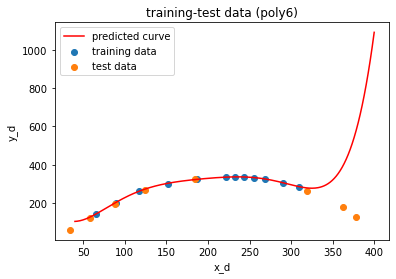

In [18]:
fig4 = plt.figure()
data_train = plt.scatter(X_train,y_train,label='training data')
data_test = plt.scatter(X_test,y_test,label='test data')
curve_p = plt.plot(X_range,y_6_range_predict,'r',label='predicted curve')
plt.title('training-test data (poly6)')
plt.xlabel('x_d')
plt.ylabel('y_d')
plt.legend()
plt.show()